Code to remove duplicates that appear after combining different databases (Web of Science, Scopus, Scielo, etc).
This is part of the project described in <https://github.com/amchagas/OSH_papers_DB>, check the project readme for more details.

In [1]:
#import necessary libraries
import os
import pandas as pd
import seaborn as sns
import bibtexparser
import matplotlib.pyplot as plt


In [2]:
#databases output path
dataPath = "../data/"
scopusPath = "scopus.bib"
wos1Path = "wos_1to500.bib"
wos2Path = "wos_501to835.bib"
scieloPath = "scielo.bib"

#path to store figures
outputPath = "../figures/"

## notes on similarities and differences between the databases

### Document_type vs type

- Scopus sets "document_types" as a column, indicating Articles, proceedings, etc
- Web of Science sets this column as "type".

**Because of the above, we set Scopus to "type" so there aren't two columns with the same kind of data on the joint panda dataframe**

In [3]:
# Open Scopus database

with open(dataPath+scopusPath) as scopusFile:
    scopusDatabase = bibtexparser.load(scopusFile)

scData = pd.DataFrame(scopusDatabase.entries)
scData = scData.rename(columns={"document_type": "type"})
scData.to_csv(dataPath+"scData.csv")





In [4]:
#Open Web of Science database

with open(dataPath+wos1Path) as wosFile1:
    wosDatabase = bibtexparser.load(wosFile1)
wosData1 = pd.DataFrame(wosDatabase.entries)

with open(dataPath+wos2Path) as wosFile2:
    wosDatabase = bibtexparser.load(wosFile2)
wosData2 = pd.DataFrame(wosDatabase.entries)

wosData = pd.concat([wosData1,wosData2], axis=0, join='outer', ignore_index=True, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True,sort=False)

wosData.to_csv(dataPath+"wos.csv")

In [5]:
#join all databases
allData = pd.concat([wosData,scData], axis=0, join='outer', ignore_index=True, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True,sort=False)

#web of science exports data with {} on every entry. 
# so the next lines clean it up.
for key in allData.keys():
    allData[key]=allData[key].str.replace("{","")
    allData[key]=allData[key].str.replace("}","")

#convert the year string type to int (making it easier to plot histograms)
allData.year = allData.year.astype(int)

allData.to_csv(dataPath+"allData.csv")

In [6]:
len(set(allData.journal[allData.type=="Article"]))

508


number of articles: 805



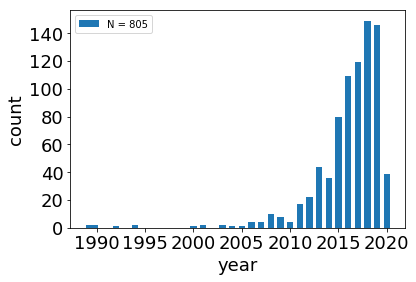

In [31]:

fHandle = allData.year[allData.type=="Article"].plot(kind="hist",
                 fontsize=18,
                 bins=list(set(allData.year+0.5)),
                 rwidth=0.65,
                # color="blue",
                )
fHandle.set(xlabel="Year")
fHandle.axes.xaxis.set_label_text(label="year",fontsize=18)
fHandle.axes.yaxis.set_label_text(label="count",fontsize=18)
fHandle.legend(["N = " + str(len(allData.year[allData.type=="Article"]))])
#fHandle.suptitle("test")

fHandle.figure.savefig(outputPath+ "test.png")


print("\n"+"number of articles: " + str(len(allData.year[allData.type=="Article"]))+ "\n")


TypeError: 'Text' object is not callable

In [10]:
set(scData.language)

{'Chinese',
 'English',
 'English; Portuguese',
 'English; Spanish',
 'German',
 'Italian',
 'Korean',
 'Portuguese',
 'Spanish',
 'Turkish'}